In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import re
import numpy as np

In [ ]:
#import pandas as pd
#data = pd.read_csv("/content/drive/MyDrive/Movie Review data/IMDB Dataset.csv")
#data.shape
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#data['label'] = le.fit_transform(data['sentiment'])
#from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
#import nltk
#nltk.download('stopwords')
#sw = set(stopwords.words('english'))
#ps = PorterStemmer()
#import re
#def clean_text(sample):
 # sample = sample.lower()
  #sample = sample.replace("<br /><br />","")
  #sample = re.sub("[^a-zA-Z]+"," ",sample)
  #sample = sample.split()
  #sample = [ps.stem(s) for s in sample if s not in sw]
  #sample = " ".join(sample)
  #return sample
#data.loc[:,'clean']=data['review'].apply(clean_text)
#data.to_csv('/content/drive/MyDrive/Movie Review data/cleaned_data.csv')
#train_data=data.iloc[:42500,:]
#test_data= data.iloc[42500:,:]
#train_data.to_csv('/content/drive/MyDrive/Movie Review data/cleaned_train_data.csv')
#test_data.to_csv('/content/drive/MyDrive/Movie Review data/cleaned_test_data.csv')

(50000, 2)

In [5]:
train_data =pd.read_csv("/content/drive/MyDrive/Movie Review data/cleaned_train_data.csv")
test_data =pd.read_csv("/content/drive/MyDrive/Movie Review data/cleaned_test_data.csv")

#Converting textual data into numeric form 
#TFIDF

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
cv = CountVectorizer(max_df = 0.5,max_features = 50000)
X_train = cv.fit_transform(train_data['clean'].values)
X_test = cv.transform(test_data['clean'].values)
print(X_train.shape)
type(X_train)

(42500, 50000)


scipy.sparse.csr.csr_matrix

In [7]:
tfidf = TfidfTransformer()
X_train1 = tfidf.fit_transform(X_train)
X_test1 = tfidf.transform(X_test)
X_test1.shape ,X_train1.shape

((7500, 50000), (42500, 50000))

In [ ]:
#print(X_train1[0])
#print(type(X_train1))
#print(train_data["label"].dtype)

Data Distribution
Total reviews = 50k
Training data = 35k (70%)
Validation data = 7.5k(15%)
Test data = 7.5k(15%)

In [ ]:
#X_final_train = X_train1[:35000]
#X_final_valid = X_train1[35000:]
#Y_final_train = train_data['label'][:35000]
#Y_final_valid =train_data['label'][35000:]

#Converting csr matrix and nparray to tensorsparse

In [8]:
import tensorflow as tf
import numpy as np
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))

In [9]:
X_final_train = convert_sparse_matrix_to_sparse_tensor(X_train1[:35000])
X_final_valid = convert_sparse_matrix_to_sparse_tensor( X_train1[35000:])
X_final_test = convert_sparse_matrix_to_sparse_tensor(X_test1)

In [10]:
type(X_final_train)

tensorflow.python.framework.sparse_tensor.SparseTensor

In [11]:
Y_final_train = tf.convert_to_tensor(train_data['label'][:35000])
Y_final_valid = tf.convert_to_tensor(train_data['label'][35000:])
Y_final_test = tf.convert_to_tensor(test_data['label'])

In [12]:
print(Y_final_valid.shape,Y_final_train.shape)
print(X_final_valid.shape,Y_final_train.shape)

(7500,) (35000,)
(7500, 50000) (35000,)


#Neural Network Architecture
Feedforward and backpropogation


*   Input layer = 50 k features
*   1st Hidden layer = 16 Neurons's| relu activation function
*   2nd Hidden Layer = 16 Neuron's | relu activation function 
*   Output Layer = 1 Neuron | sigmoid function











In [13]:
# Total features =50k, i.e Input to the First hidden layer
X_final_train.shape[1]

50000

In [14]:
from keras import models
from keras.layers import Dense
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(X_final_train.shape[1],)))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                800016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
X_final_train.shape

TensorShape([35000, 50000])

#Optimization algorithm = rmsprop

In [16]:
model.compile(optimizer="rmsprop",loss = "binary_crossentropy",metrics=["accuracy"])

In [17]:
hist = model.fit(X_final_train,Y_final_train,batch_size=200,epochs=5,validation_data=(X_final_valid,Y_final_valid))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


175/175 [==============================] - 17s 15ms/step - loss: 0.6232 - accuracy: 0.7607 - val_loss: 0.3639 - val_accuracy: 0.8840
Epoch 2/5
175/175 [==============================] - 2s 12ms/step - loss: 0.2913 - accuracy: 0.9069 - val_loss: 0.2501 - val_accuracy: 0.8989
Epoch 3/5
175/175 [==============================] - 2s 11ms/step - loss: 0.1809 - accuracy: 0.9335 - val_loss: 0.2453 - val_accuracy: 0.8989
Epoch 4/5
175/175 [==============================] - 2s 11ms/step - loss: 0.1442 - accuracy: 0.9476 - val_loss: 0.2555 - val_accuracy: 0.8981
Epoch 5/5
175/175 [==============================] - 2s 12ms/step - loss: 0.1250 - accuracy: 0.9559 - val_loss: 0.2695 - val_accuracy: 0.8947


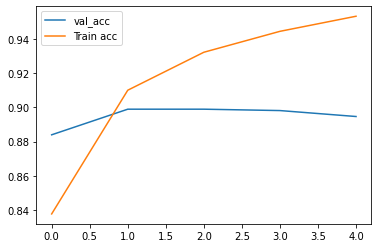

In [18]:
import matplotlib.pyplot as plt
result = hist.history
plt.plot(result["val_accuracy"],label ="val_acc")
plt.plot(result["accuracy"],label="Train acc")
plt.legend()
plt.show()

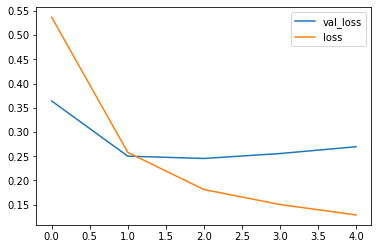

In [19]:
plt.plot(result["val_loss"],label ="val_loss")
plt.plot(result["loss"],label="loss")
plt.legend()
plt.show()

In [20]:
model.evaluate(X_final_valid,Y_final_valid)

235/235 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.8947


[0.26951920986175537, 0.8946666717529297]

#**End** **Result**
#Accuracy = 89.8%

Value loss(Minimum) = 24.5%

**References**

> https://faroit.com/keras-docs/1.2.0/

> https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a

> https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

>https://stackoverflow.com/questions/38676436/a-transition-from-countvectorizer-to-tfidftransformer-in-sklearn

> https://towardsdatascience.com/tf-idf-explained-and-python-sklearn-implementation-b020c5e83275











